In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from skimage.metrics import peak_signal_noise_ratio as psnr
import os


Matplotlib is building the font cache; this may take a moment.


In [7]:
# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Generate noisy images by adding Gaussian noise
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


num_train_images = x_train.shape[0]
num_test_images = x_test.shape[0]

# Total number of images
total_images = num_train_images + num_test_images

print(f"Number of training images: {num_train_images}")
print(f"Number of test images: {num_test_images}")
print(f"Total number of images: {total_images}")

Number of training images: 50000
Number of test images: 10000
Total number of images: 60000


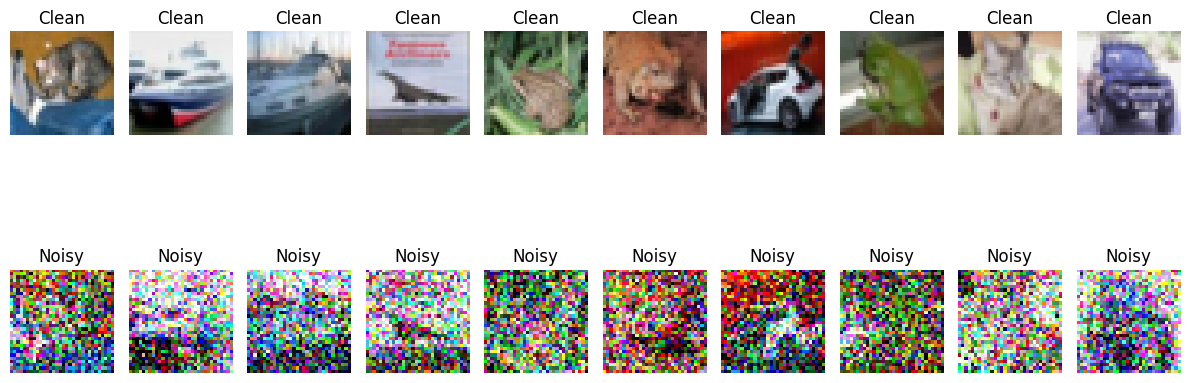

In [8]:
# Define a function to display images
def plot_images(images, noisy_images, num_images=10):
    plt.figure(figsize=(12, 6))
    
    for i in range(num_images):
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i])
        plt.title("Clean")
        plt.axis("off")
        
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(noisy_images[i])
        plt.title("Noisy")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Display images
plot_images(x_test, x_test_noisy)


In [9]:
def build_autoencoder(input_shape):
    # Encoder
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = Model(input_img, decoded)
    return autoencoder

# Define model
input_shape = (32, 32, 3)
autoencoder = build_autoencoder(input_shape)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse')


In [9]:
def build_autoencoder(input_shape):
    # Encoder
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = Model(input_img, decoded)
    return autoencoder

# Define model
input_shape = (32, 32, 3)
autoencoder = build_autoencoder(input_shape)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse')


In [10]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, validation_data=(x_test_noisy, x_test))


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - loss: 0.0245 - val_loss: 0.0118
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 0.0099 - val_loss: 0.0097
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 12/50
391/391 ━━━━━━━━━━

In [11]:
# Evaluate the model on the test set
test_loss = autoencoder.evaluate(x_test_noisy, x_test)
print(f"Test Loss (MSE): {test_loss}")

# Calculate PSNR for a few test images
denoised_images = autoencoder.predict(x_test_noisy)
psnr_value = psnr(x_test[0], denoised_images[0])
print(f"PSNR for the first test image: {psnr_value}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0082
Test Loss (MSE): 0.00815295334905386
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
PSNR for the first test image: 20.002289609233934


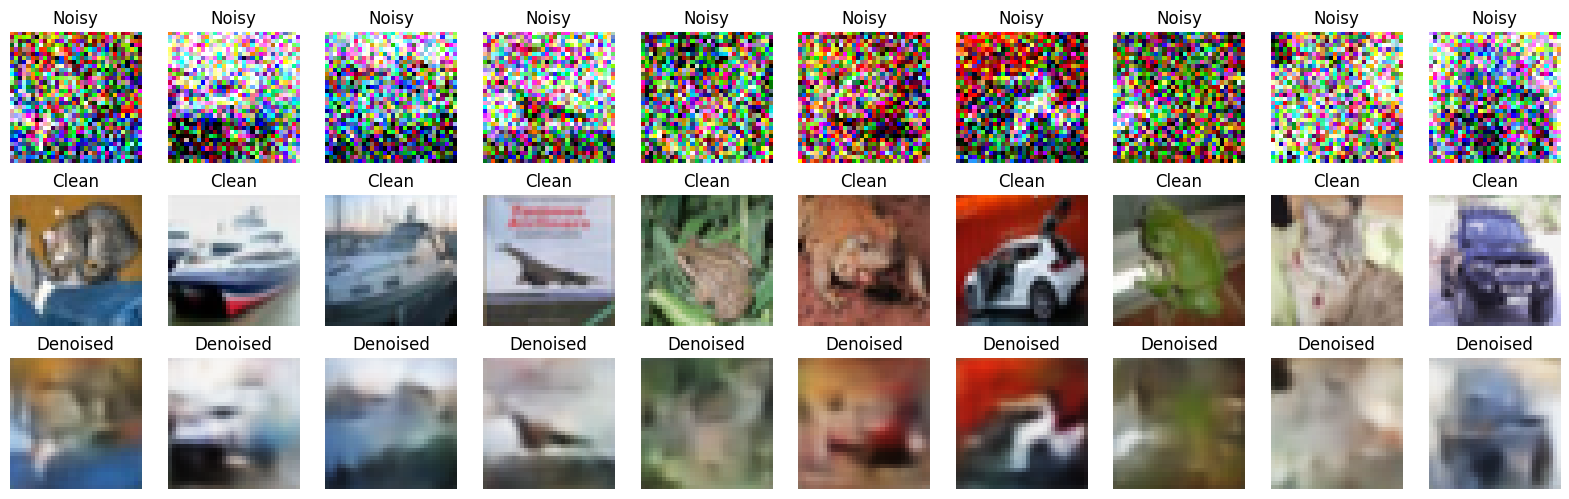

In [12]:
def display_images(noisy_images, clean_images, denoised_images, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Display noisy image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy_images[i])
        plt.title("Noisy")
        plt.axis("off")

        # Display clean image
        ax = plt.subplot(3, n, i + n + 1)
        plt.imshow(clean_images[i])
        plt.title("Clean")
        plt.axis("off")

        # Display denoised image
        ax = plt.subplot(3, n, i + 2 * n + 1)
        plt.imshow(denoised_images[i])
        plt.title("Denoised")
        plt.axis("off")
    plt.show()

# Display results
display_images(x_test_noisy, x_test, denoised_images)


In [13]:
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Load a new image
new_image_path = '/Users/sehed.girsi/Desktop/image-denoising-autoencoder/tests/test-images'
new_image = load_and_preprocess_image(new_image_path)

# Add noise
new_image_noisy = new_image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=new_image.shape)
new_image_noisy = np.clip(new_image_noisy, 0., 1.)

# Denoise the image using the autoencoder
denoised_new_image = autoencoder.predict(new_image_noisy)

# Visualize the results
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.title("Noisy Image")
plt.imshow(new_image_noisy[0])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Denoised Image")
plt.imshow(denoised_new_image[0])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Original Image")
plt.imshow(new_image[0])
plt.axis('off')

plt.show()


IsADirectoryError: [Errno 21] Is a directory: '/Users/sehed.girsi/Desktop/image-denoising-autoencoder/tests/test-images'

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os



In [16]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def denoise_image(autoencoder, noisy_img_array):
    return autoencoder.predict(noisy_img_array)


In [17]:
def process_noisy_images_in_folder(folder_path, autoencoder):
    # Create lists to store the results
    original_images = []
    noisy_images = []
    denoised_images = []

    # Iterate over all files in the folder
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        
        if img_file.lower().endswith(('png', 'jpg', 'jpeg')):  # Check if the file is an image
            # Load and preprocess image
            img_array = load_and_preprocess_image(img_path)

            # Noisy images should already be noisy, so just take them as is
            noisy_img_array = img_array

            # Denoise the image
            denoised_img_array = denoise_image(autoencoder, noisy_img_array)

            # Append results to the lists
            original_images.append(img_array[0])
            noisy_images.append(noisy_img_array[0])
            denoised_images.append(denoised_img_array[0])

    return original_images, noisy_images, denoised_images


In [18]:
def visualize_results(original_images, noisy_images, denoised_images, num_images=5):
    plt.figure(figsize=(15, num_images * 5))
    
    for i in range(min(num_images, len(original_images))):
        plt.subplot(num_images, 3, 3*i + 1)
        plt.title("Original")
        plt.imshow(original_images[i])
        plt.axis('off')

        plt.subplot(num_images, 3, 3*i + 2)
        plt.title("Noisy")
        plt.imshow(noisy_images[i])
        plt.axis('off')

        plt.subplot(num_images, 3, 3*i + 3)
        plt.title("Denoised")
        plt.imshow(denoised_images[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


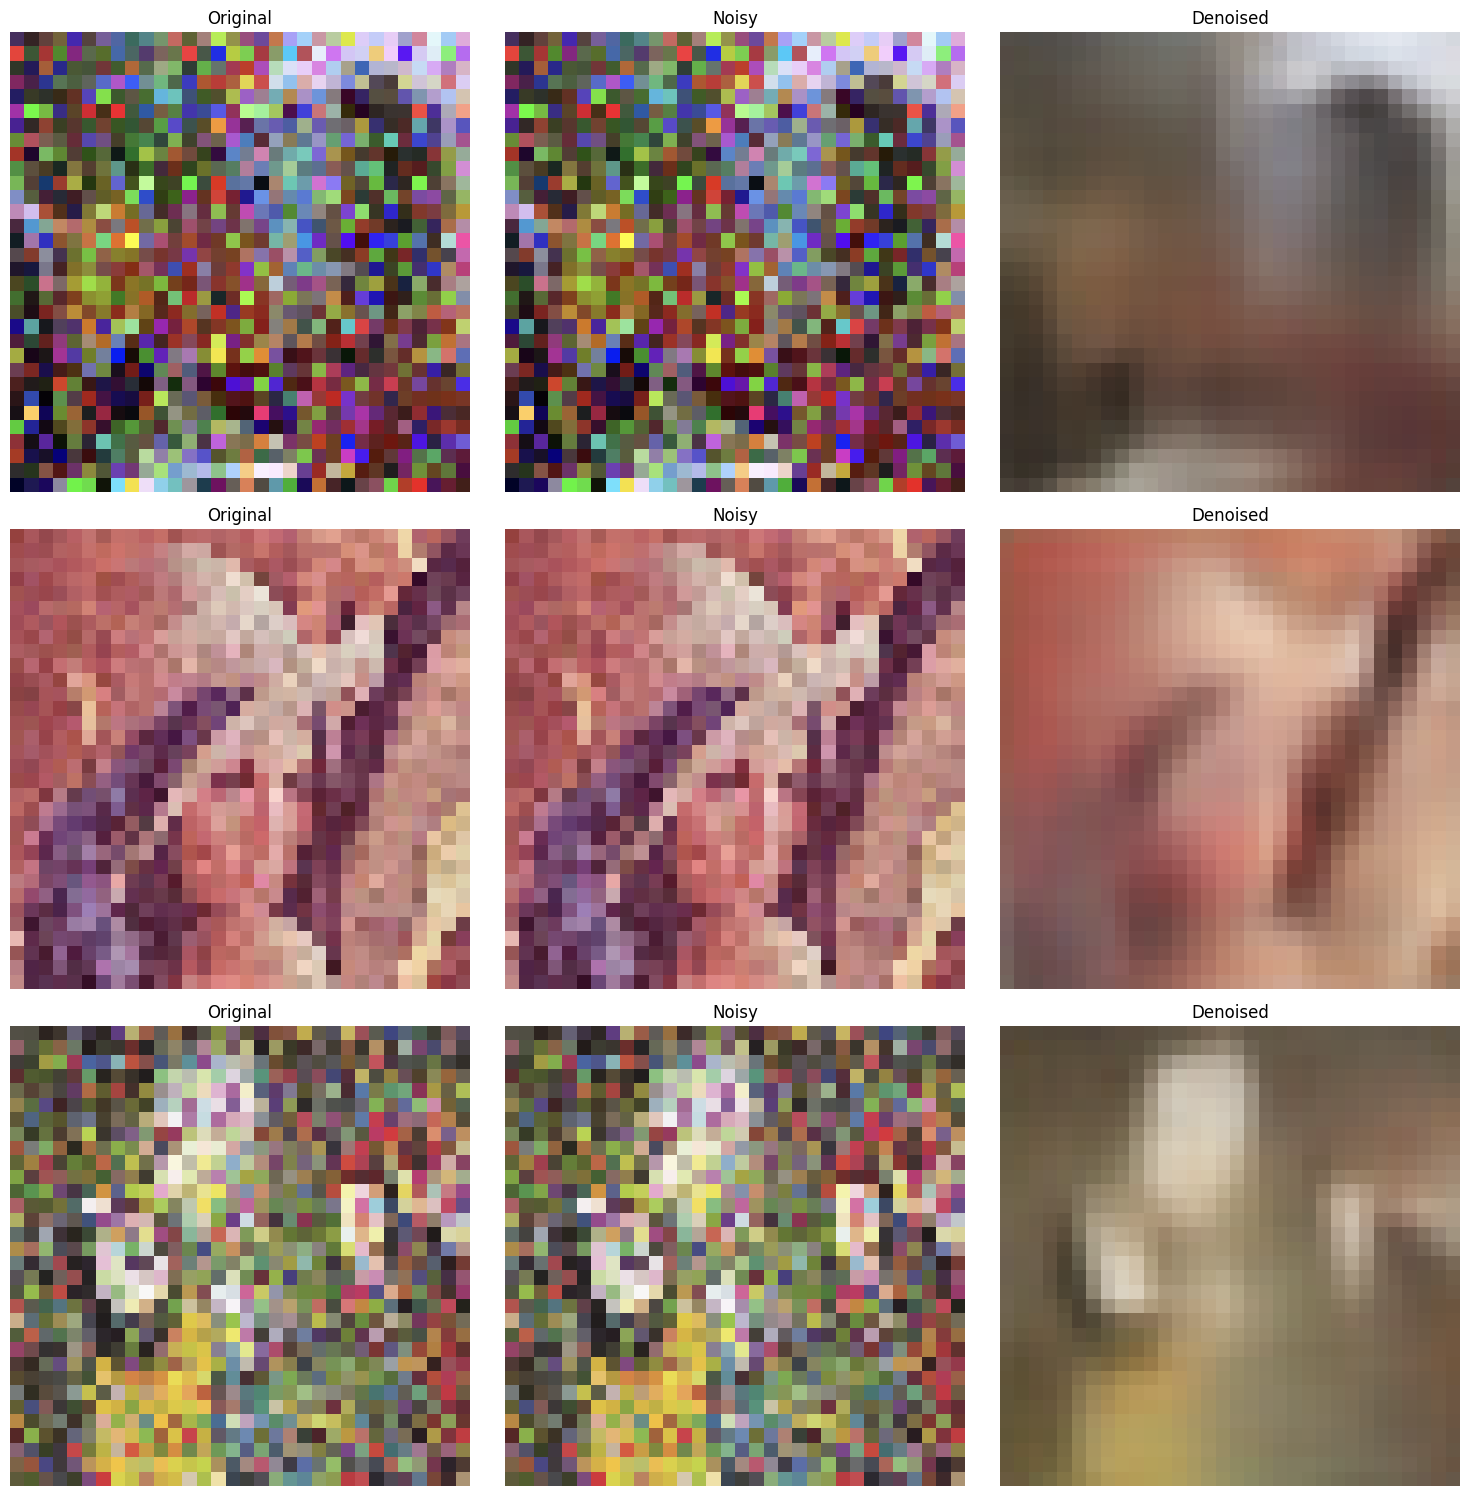

In [19]:
folder_path = '/Users/sehed.girsi/Desktop/image-denoising-autoencoder/tests/test-images'

# Assuming 'autoencoder' is your trained model
original_images, noisy_images, denoised_images = process_noisy_images_in_folder(folder_path, autoencoder)

# Visualize results
visualize_results(original_images, noisy_images, denoised_images, num_images=5)


In [23]:
import os
import matplotlib.pyplot as plt

# Save the model
autoencoder.save('denoising_autoencoder.h5')

# Define the output directory for saving denoised images
output_dir = '/Users/sehed.girsi/Desktop/image-denoising-autoencoder/tests/denoised-images'
os.makedirs(output_dir, exist_ok=True)

# Save the first 10 denoised images
for i in range(min(10, len(denoised_images))):
    # Rescale images from [0, 1] to [0, 255] for saving as PNG
    img_to_save = (denoised_images[i] * 255).astype(np.uint8)
    # Save the image using plt.imsave
    plt.imsave(f"{output_dir}/denoised_{i}.png", img_to_save)

print(f"Denoised images saved to {output_dir}")



Denoised images saved to /Users/sehed.girsi/Desktop/image-denoising-autoencoder/tests/denoised-images


/Users/sehed.girsi/Desktop/image-denoising-autoencoder/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
